In [126]:
%matplotlib inline

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import seaborn
import seaborn as sea

In [103]:
# Country Vs Drivers
# Study data files
    drivers = "Resources/drivers.csv"
    drivers_df = pd.read_csv(drivers, encoding='latin1')
    drivers_df.head()


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [104]:
# Getting the duplicate 
duplicate_rows = drivers_df[drivers_df.duplicated(['driverId', 'nationality'])]
duplicate_rows

,driverId,driverRef,number,code,forename,surname,dob,nationality,url


In [56]:
clean_df = drivers_df.drop_duplicates("driverId")
clean_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,\N,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,\N,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


In [87]:
# Calculate number of drivers per country
drivers_count = clean_df.groupby("nationality")["driverId"].nunique()

#write to the new dataframe
drivers_count_df = pd.DataFrame({"No. of drivers": drivers_count})
drivers_count_df

,No. of drivers
nationality,
American,157
American-Italian,1
Argentine,24
Argentine-Italian,1
Australian,17
Austrian,15
Belgian,23
Brazilian,32
British,165


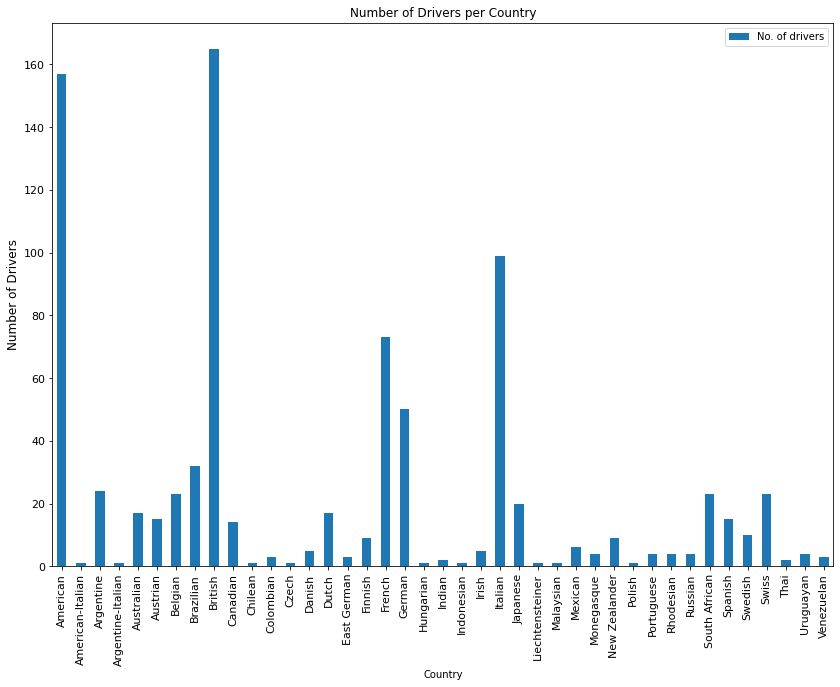

In [130]:
# Generate a bar plot showing country vs number of drivers
drivers_count_df = pd.DataFrame({"No. of drivers": drivers_count})


plot_pandas = drivers_count_df.plot.bar(figsize=(14, 10), fontsize = 11)
plt.xlabel("Country",fontsize = 10)
plt.ylabel("Number of Drivers",fontsize = 12)
plt.title("Number of Drivers per Country",fontsize = 12)

plt.show()


In [138]:
# to find number of constructors per country

constructors = "Resources/constructors.csv"
constructors_df = pd.read_csv(constructors, delimiter=",")
constructors_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [139]:
# Getting the duplicate 
duplicate_rows = constructors_df[constructors_df.duplicated(['name', 'nationality'])]
clean_df = constructors_df.drop_duplicates("name")
clean_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [186]:
# Calculate number of constructors per country
constructors_count = clean_df.groupby("nationality")["name"].nunique()
#constructors_name = clean_df.groupby("nationality")["constructorRef"].keys()


#write to the new dataframe
constructors_count_df = pd.DataFrame({"No. of constructors":constructors_count,"names of constructors":constructors_name })
constructors_count_df

,No. of constructors,names of constructors
nationality,,
American,39,39
Australian,1,1
Austrian,1,1
Belgium,1,1
Brazilian,1,1
British,86,86
Canadian,2,2
Dutch,3,3
East German,1,1


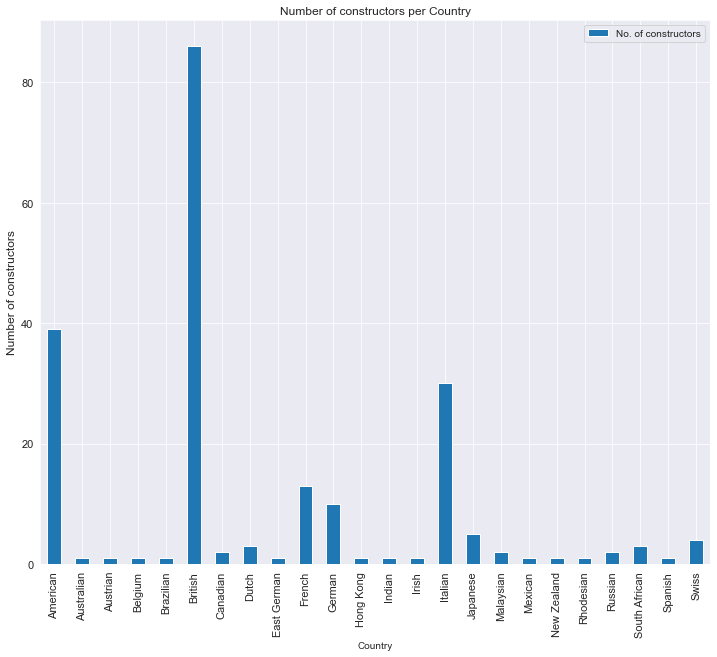

In [187]:
# Generate a bar plot showing country vs number of constructors
constructors_count_df = pd.DataFrame({"No. of constructors": constructors_count})


plot_pandas = constructors_count_df.plot.bar(figsize=(12, 10), fontsize = 11)
plt.xlabel("Country",fontsize = 10)
plt.ylabel("Number of constructors",fontsize = 12)
plt.title("Number of constructors per Country",fontsize = 12)

plt.show()